In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import os 
os.getcwd()
os.chdir("D:\\2022\\Team-51")   # change to your personal directory
os.getcwd()

'D:\\2022\\Team-51'

In [2]:
# if we want to switch from showing all rows vs the default view

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# pd.reset_option('display.max_columns', None)
# pd.reset_option('display.max_rows', None)

## Part 1: Data Cleaning 

In [3]:
# read in raw data
raw_data = pd.read_csv('Data\crime_and_zip_datatype_with_edu_fund_02.csv', sep='|', encoding='utf16')

In [4]:
raw_data.shape

(11516, 165)

In [5]:
raw_data.head(5)

,communityName,state,countyCode,communityCode,population,householsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumKidsBornNeverMar,PctKidsBornNeverMar,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,OwnOccQrange,RentLowQ,RentMedian,RentHighQ,RentQrange,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,murders,murdPerPop,rapes,rapesPerPop,robberies,robbbPerPop,assaults,assaultPerPop,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop,zip,type,decommissioned,primary_city,acceptable_cities,unacceptable_cities,county,timezone,area_codes,world_region,country,latitude,longitude,irs_estimated_population,has_pp_access,TOTALREV,federalPct,statePct,localPct
0,Houston,TX,NaN,NaN,1630553,2.64,28.09,52.69,4.12,27.63,14.40,30.53,14.73,7.54,1630672,100.0,26261,82.75,0.84,32.14,17.90,7.06,9.26,30248,14261,19817,8366,12239,12250,6249.0,7021,332974,20.74,14.21,29.52,25.09,8.18,63.67,11.72,22.81,13.13,27.81,12.72,36.66,17.35,15.07,3.33,64.89,59.42,75.35,66.39,57.29,64.15,77924,6.91,290374,17.21,27.02,38.75,58.02,3.07,4.81,6.90,10.33,69.33,8.38,9.93,6.30,2.60,2.78,2.47,47.55,11.72,62.65,2,109558,84.92,44.59,12.67,41.88,1969,8.45,0.82,38100,58000,91900,53800,255,328,421,166,390,23.6,19.9,13.4,1780,151,17.81,56.97,45.36,82.72,89.76,4104.0,236.63,3570.0,205.84,2320218.0,133781.41,565.4,236.6,78.88,73.66,14.40,11.40,0.39,26.17,138.0,12.0,27.0,559.3,2915.3,6.54,2163.0,223299392.0,86.99,5.0,3.36,128752.20,446,25.72,1109.0,63.94,NaN,NaN,NaN,NaN,27022.0,1558.06,61569.0,3550.01,27519.0,1586.72,1549.0,89.31,NaN,6784.10,77075.0,STANDARD,0.0,Houston,NaN,NaN,Harris County,America/Chicago,"281,713,832",NaN,US,29.62,-95.27,35640.0,0,1.280887e+09,9.48,31.02,59.49
1,Little Rock,AR,NaN,NaN,175795,2.42,33.98,64.68,0.87,0.76,13.54,27.86,13.17,11.13,175781,100.0,26889,79.02,0.93,37.56,23.85,5.67,14.37,34347,15307,19395,7559,19763,12880,16843.0,12926,25193,14.62,6.11,18.05,30.34,5.26,64.12,10.37,31.40,10.41,33.74,11.93,31.08,16.45,14.40,3.04,64.44,58.75,73.91,64.45,70.33,75.92,8160,6.51,3638,22.37,29.36,40.43,49.78,0.46,0.61,0.84,1.03,96.23,0.54,4.72,2.97,2.37,2.57,2.11,61.04,3.06,49.15,3,8422,89.60,56.21,9.25,36.43,1968,5.86,0.51,44200,64200,92700,48500,239,318,395,156,415,26.9,19.8,13.0,140,1,2.07,70.81,48.80,80.79,89.48,100.0,55.30,74.0,40.92,28293.0,15647.00,282.9,55.3,82.68,82.00,18.00,0.00,0.00,18.00,4.0,5.0,0.0,106.6,1649.7,1.44,100.0,8265000.0,74.00,0.0,4.00,45708.20,68,37.61,215.0,118.90,1136.0,628.25,4468.0,2470.95,5796.0,3205.38,14306.0,7911.

In [6]:
# look at all column titles 
# list(raw_data.columns)

In [7]:
# manually go through and keep only the variables that are relevant to our business problem:
to_keep_relevant = ['communityName','state','population','householsize',  
                  'agePct12t21','agePct12t29','agePct16t24','agePct65up', # demographics: age 
                  'pctWSocSec','pctWPubAsst','PctUsePubTrans','has_pp_access', # social programs/ assistance 
                  'PctPopUnderPov', # poverty 
                  'PctLess9thGrade','PctNotHSGrad','PctBSorMore', # education
                  'PctUnemployed','PctEmploy','PctEmplManu','PctEmplProfServ','PctOccupManu','PctOccupMgmtProf', # employment
                  'PersPerFam','PctFam2Par','PctKids2Par','PctYoungKids2Par','PctTeen2Par','PctWorkMomYoungKids','PctWorkMom','PctKidsBornNeverMar', # family demographics
                  'HousVacant','PctHousOccup','PctHousOwnOcc','PctVacantBoarded','PctVacMore6Mos', # housing occupancy
                  'LemasSwornFT','LemasSwFTPerPop','LemasSwFTFieldOps','LemasSwFTFieldPerPop','LemasTotalReq','LemasTotReqPerPop', 
                  'PolicReqPerOffic','PolicPerPop','RacialMatchCommPol',
                  'OfficAssgnDrugUnits','NumKindsDrugsSeiz','PolicAveOTWorked',
                  'PolicCars','PolicOperBudg','LemasPctPolicOnPatr','LemasGangUnitDeploy','LemasPctOfficDrugUn','PolicBudgPerPop', # policing 
                  'federalPct','statePct','localPct', # education spending 
                  'ViolentCrimesPerPop', # response variable
                 ]


In [8]:
raw_data_relevant = raw_data[to_keep_relevant]
raw_data_relevant.shape

(11516, 57)

In [9]:
raw_data_relevant.head()

,communityName,state,population,householsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,pctWSocSec,pctWPubAsst,PctUsePubTrans,has_pp_access,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,PctKidsBornNeverMar,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,federalPct,statePct,localPct,ViolentCrimesPerPop
0,Houston,TX,1630553,2.64,14.40,30.53,14.73,7.54,17.90,7.06,6.54,0,20.74,14.21,29.52,25.09,8.18,63.67,11.72,22.81,13.13,27.81,3.33,64.89,59.42,75.35,66.39,57.29,64.15,6.91,109558,84.92,44.59,12.67,41.88,4104.0,236.63,3570.0,205.84,2320218.0,133781.41,565.4,236.6,78.88,138.0,12.0,27.0,2163.0,223299392.0,86.99,5.0,3.36,128752.20,9.48,31.02,59.49,NaN
1,Little Rock,AR,175795,2.42,13.54,27.86,13.17,11.13,23.85,5.67,1.44,0,14.62,6.11,18.05,30.34,5.26,64.12,10.37,31.40,10.41,33.74,3.04,64.44,58.75,73.91,64.45,70.33,75.92,6.51,8422,89.60,56.21,9.25,36.43,100.0,55.30,74.0,40.92,28293.0,15647.00,282.9,55.3,82.68,4.0,5.0,0.0,100.0,8265000.0,74.00,0.0,4.00,45708.20,NaN,NaN,NaN,3255.71
2,Waterbury,CT,108961,2.52,12.46,27.70,12.94,14.74,31.57,9.95,3.18,0,12.09,15.26,33.18,14.11,7.77,59.92,27.06,22.88,18.48,22.31,3.10,64.25,59.50,71.13,69.69,54.74,66.16,6.61,4041,91.44,49.02,7.00,36.35,315.0,304.28,285.0,275.30,94000.0,90801.10,298.4,304.3,98.60,28.0,6.0,98.4,86.0,20654224.0,90.48,0.0,8.89,199513.41,NaN,NaN,NaN,566.06
3,Waterbury,CT,108961,2.52,12.46,27.70,12.94,14.74,31.57,9.95,3.18,0,12.09,15.26,33.18,14.11,7.77,59.92,27.06,22.88,18.48,22.31,3.10,64.25,59.50,71.13,69.69,54.74,66.16,6.61,4041,91.44,49.02,7.00,36.35,315.0,304.28,285.0,275.30,94000.0,90801.10,298.4,304.3,98.60,28.0,6.0,98.4,86.0,20654224.0,90.48,0.0,8.89,199513.41,NaN,NaN,NaN,566.06
4,Waterbury,CT,108961,2.52,12.46,27.70,12.94,14.74,31.57,9.95,3.18,0,12.09,15.26,33.18,14.11,7.77,59.92,27.06,22.88,18.48,22.31,3.10,64.25,59.50,71.13,69.69,54.74,66.16,6.61,4041,91.44,49.02,7.00,36.35,315.0,304.28,285.0,275.30,94000.0,90801.10,298.4,304.3,98.60,28.0,6.0,98.4,86.0,20654224.0,90.48,0.0,8.89,199513.41,NaN,NaN,NaN,566.06


Note: the raw data comes in at the zip code level because we had to break down the communities into zip codes to join to ancillary datasets.   

However, we want the final featureset aggregated back up to the communityName level. 

In [10]:
# first, columns that need aggregation (these were from an ancillary data source: 
aux_data = raw_data_relevant[['communityName', 'federalPct', 'statePct', 'localPct', 'has_pp_access']]
aux_data.head()

,communityName,federalPct,statePct,localPct,has_pp_access
0,Houston,9.48,31.02,59.49,0
1,Little Rock,NaN,NaN,NaN,0
2,Waterbury,NaN,NaN,NaN,0
3,Waterbury,NaN,NaN,NaN,0
4,Waterbury,NaN,NaN,NaN,0


In [11]:
pp = pd.DataFrame(aux_data.groupby('communityName')['has_pp_access'].max())
pp.head()

,has_pp_access
communityName,
Aberdeen,0
Ada,0
Adrian,0
Agoura Hills,0
Aiken,0


In [12]:
edu_spending = pd.DataFrame(aux_data.groupby('communityName')[['federalPct','statePct', 'localPct']].mean())
edu_spending.head()

,federalPct,statePct,localPct
communityName,,,
Aberdeen,4.633333,48.823333,46.543333
Ada,12.010000,63.510000,24.475000
Adrian,7.690000,57.660000,34.640000
Agoura Hills,1.110000,42.940000,55.950000
Aiken,7.870000,58.270000,33.860000


In [13]:
len(raw_data_relevant['communityName'].unique())

1886

Now need to extract only the first row of the raw data for each communityName (since they were duplicated in the original join)


In [14]:
raw_data_bycomm = raw_data_relevant.groupby('communityName').first()
raw_data_bycomm.shape

(1886, 56)

In [15]:
# remove the non-aggregated aux data colms before merging back with the aggregated data
raw_data_bycomm.drop(columns = ['federalPct', 'statePct', 'localPct', 'has_pp_access'], inplace = True)
raw_data_bycomm.shape

(1886, 52)

In [16]:
# join everything back to have the full dataset by community name
full_data = raw_data_bycomm.merge(pp, on = 'communityName', how = 'left')
full_data = full_data.merge(edu_spending, on = 'communityName', how = 'left')
full_data.shape  # (1886, 56)
full_data.head()

,state,population,householsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,pctWSocSec,pctWPubAsst,PctUsePubTrans,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,PctKidsBornNeverMar,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop,has_pp_access,federalPct,statePct,localPct
communityName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aberdeen,NJ,17038,2.89,12.71,26.94,12.14,7.59,19.87,2.93,12.82,3.18,5.85,17.15,28.03,5.16,69.55,14.72,23.10,11.25,35.52,3.27,83.88,79.31,92.94,85.46,55.57,68.56,1.76,265,95.71,80.47,6.42,44.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,297.32,0,4.633333,48.823333,46.543333
Ada,OK,15820,2.37,18.54,30.44,19.51,17.77,36.76,10.01,0.19,22.93,12.72,29.43,23.32,8.39,51.63,13.74,32.69,14.14,28.24,2.88,66.19,63.11,80.80,64.06,63.36,69.18,1.43,931,87.75,56.21,3.97,41.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,532.85,0,12.010000,63.510000,24.475000
Adrian,MI,22097,2.95,19.43,31.86,18.85,12.21,29.58,14.00,0.49,20.65,11.69,28.82,15.98,8.37,55.91,24.18,27.55,20.02,23.95,3.18,65.52,61.92,61.68,69.60,59.47,69.15,3.98,363,95.37,58.22,3.31,31.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.690000,57.660000,34.640000
Agoura Hills,CA,20390,3.08,15.82,24.89,11.47,3.61,10.53,1.58,0.62,3.53,1.60,7.13,44.15,3.61,74.64,11.71,23.43,4.40,44.57,3.37,86.68,86.65,91.45,87.03,52.78,65.20,0.54,317,95.42,83.40,0.63,15.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,368.76,0,1.110000,42.940000,55.950000
Aiken,SC,19872,2.56,12.26,23.43,10.72,14.62,30.95,8.48,0.00,15.69,9.75,20.62,33.06,4.96,56.88,24.96,23.75,12.07,38.22,3.05,70.11,64.51,81.36,69.09,60.68,68.55,4.59,794,90.71,66.18,3.02,37.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,504.20,0,7.870000,58.270000,33.860000


In [17]:
num_comms = len(full_data)
num_comms

1886

## Part 2: Data Preparation

In [18]:
# first, look at proportion of null values in our full data set 
full_data.isna().sum(axis = 0)

state                      0
population                 0
householsize               0
agePct12t21                0
agePct12t29                0
agePct16t24                0
agePct65up                 0
pctWSocSec                 0
pctWPubAsst                0
PctUsePubTrans             0
PctPopUnderPov             0
PctLess9thGrade            0
PctNotHSGrad               0
PctBSorMore                0
PctUnemployed              0
PctEmploy                  0
PctEmplManu                0
PctEmplProfServ            0
PctOccupManu               0
PctOccupMgmtProf           0
PersPerFam                 0
PctFam2Par                 0
PctKids2Par                0
PctYoungKids2Par           0
PctTeen2Par                0
PctWorkMomYoungKids        0
PctWorkMom                 0
PctKidsBornNeverMar        0
HousVacant                 0
PctHousOccup               0
PctHousOwnOcc              0
PctVacantBoarded           0
PctVacMore6Mos             0
LemasSwornFT            1554
LemasSwFTPerPo

In [19]:
# off the bat, remove features that have more than 30% null values 
full_data2 = full_data.dropna(thresh=num_comms*0.3,how='all',axis=1)
full_data2.shape # (1886, 39)
full_data2.head()

,state,population,householsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,pctWSocSec,pctWPubAsst,PctUsePubTrans,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,PctKidsBornNeverMar,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,LemasPctOfficDrugUn,ViolentCrimesPerPop,has_pp_access,federalPct,statePct,localPct
communityName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aberdeen,NJ,17038,2.89,12.71,26.94,12.14,7.59,19.87,2.93,12.82,3.18,5.85,17.15,28.03,5.16,69.55,14.72,23.10,11.25,35.52,3.27,83.88,79.31,92.94,85.46,55.57,68.56,1.76,265,95.71,80.47,6.42,44.91,0.0,297.32,0,4.633333,48.823333,46.543333
Ada,OK,15820,2.37,18.54,30.44,19.51,17.77,36.76,10.01,0.19,22.93,12.72,29.43,23.32,8.39,51.63,13.74,32.69,14.14,28.24,2.88,66.19,63.11,80.80,64.06,63.36,69.18,1.43,931,87.75,56.21,3.97,41.14,0.0,532.85,0,12.010000,63.510000,24.475000
Adrian,MI,22097,2.95,19.43,31.86,18.85,12.21,29.58,14.00,0.49,20.65,11.69,28.82,15.98,8.37,55.91,24.18,27.55,20.02,23.95,3.18,65.52,61.92,61.68,69.60,59.47,69.15,3.98,363,95.37,58.22,3.31,31.96,0.0,NaN,0,7.690000,57.660000,34.640000
Agoura Hills,CA,20390,3.08,15.82,24.89,11.47,3.61,10.53,1.58,0.62,3.53,1.60,7.13,44.15,3.61,74.64,11.71,23.43,4.40,44.57,3.37,86.68,86.65,91.45,87.03,52.78,65.20,0.54,317,95.42,83.40,0.63,15.77,0.0,368.76,0,1.110000,42.940000,55.950000
Aiken,SC,19872,2.56,12.26,23.43,10.72,14.62,30.95,8.48,0.00,15.69,9.75,20.62,33.06,4.96,56.88,24.96,23.75,12.07,38.22,3.05,70.11,64.51,81.36,69.09,60.68,68.55,4.59,794,90.71,66.18,3.02,37.78,0.0,504.20,0,7.870000,58.270000,33.860000


In [20]:
# columns that were dropped:
full_data.columns.difference(full_data2.columns)
# can see that most of the policing features were dropped due to lack of data

Index(['LemasGangUnitDeploy', 'LemasPctPolicOnPatr', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasSwFTPerPop', 'LemasSwornFT',
       'LemasTotReqPerPop', 'LemasTotalReq', 'NumKindsDrugsSeiz',
       'OfficAssgnDrugUnits', 'PolicAveOTWorked', 'PolicBudgPerPop',
       'PolicCars', 'PolicOperBudg', 'PolicPerPop', 'PolicReqPerOffic',
       'RacialMatchCommPol'],
      dtype='object')

In [21]:
# see which features we need to normalize
# note: the response variable is already normalized as number per 100k population 

# most of the features are already standardized as percentages, only a few are still in raw count
full_data2['LemasPctOfficDrugUn'] = full_data2['LemasPctOfficDrugUn']/full_data2['population']
full_data2['HousVacant'] = full_data2['HousVacant']/full_data2['population']


C:\Users\Sophia Su\AppData\Local\Temp\ipykernel_11356\3668832530.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data2['LemasPctOfficDrugUn'] = full_data2['LemasPctOfficDrugUn']/full_data2['population']
C:\Users\Sophia Su\AppData\Local\Temp\ipykernel_11356\3668832530.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data2['HousVacant'] = full_data2['HousVacant']/full_data2['population']


In [22]:
# rename the columns we added from ancillary data sources to have more meaning:
full_data2 = full_data2.rename(columns = {'federalPct': 'PctFedEduFunding', 'statePct': 'PctStateEduFunding', 'localPct':'PctLocalEduFunding'})
full_data2.head()

,state,population,householsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,pctWSocSec,pctWPubAsst,PctUsePubTrans,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,PctKidsBornNeverMar,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,LemasPctOfficDrugUn,ViolentCrimesPerPop,has_pp_access,PctFedEduFunding,PctStateEduFunding,PctLocalEduFunding
communityName,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aberdeen,NJ,17038,2.89,12.71,26.94,12.14,7.59,19.87,2.93,12.82,3.18,5.85,17.15,28.03,5.16,69.55,14.72,23.10,11.25,35.52,3.27,83.88,79.31,92.94,85.46,55.57,68.56,1.76,0.015553,95.71,80.47,6.42,44.91,0.0,297.32,0,4.633333,48.823333,46.543333
Ada,OK,15820,2.37,18.54,30.44,19.51,17.77,36.76,10.01,0.19,22.93,12.72,29.43,23.32,8.39,51.63,13.74,32.69,14.14,28.24,2.88,66.19,63.11,80.80,64.06,63.36,69.18,1.43,0.058850,87.75,56.21,3.97,41.14,0.0,532.85,0,12.010000,63.510000,24.475000
Adrian,MI,22097,2.95,19.43,31.86,18.85,12.21,29.58,14.00,0.49,20.65,11.69,28.82,15.98,8.37,55.91,24.18,27.55,20.02,23.95,3.18,65.52,61.92,61.68,69.60,59.47,69.15,3.98,0.016428,95.37,58.22,3.31,31.96,0.0,NaN,0,7.690000,57.660000,34.640000
Agoura Hills,CA,20390,3.08,15.82,24.89,11.47,3.61,10.53,1.58,0.62,3.53,1.60,7.13,44.15,3.61,74.64,11.71,23.43,4.40,44.57,3.37,86.68,86.65,91.45,87.03,52.78,65.20,0.54,0.015547,95.42,83.40,0.63,15.77,0.0,368.76,0,1.110000,42.940000,55.950000
Aiken,SC,19872,2.56,12.26,23.43,10.72,14.62,30.95,8.48,0.00,15.69,9.75,20.62,33.06,4.96,56.88,24.96,23.75,12.07,38.22,3.05,70.11,64.51,81.36,69.09,60.68,68.55,4.59,0.039956,90.71,66.18,3.02,37.78,0.0,504.20,0,7.870000,58.270000,33.860000


In [23]:
# take one more look at null values to decide whether to drop or impute
full_data2.isna().sum()

state                    0
population               0
householsize             0
agePct12t21              0
agePct12t29              0
agePct16t24              0
agePct65up               0
pctWSocSec               0
pctWPubAsst              0
PctUsePubTrans           0
PctPopUnderPov           0
PctLess9thGrade          0
PctNotHSGrad             0
PctBSorMore              0
PctUnemployed            0
PctEmploy                0
PctEmplManu              0
PctEmplProfServ          0
PctOccupManu             0
PctOccupMgmtProf         0
PersPerFam               0
PctFam2Par               0
PctKids2Par              0
PctYoungKids2Par         0
PctTeen2Par              0
PctWorkMomYoungKids      0
PctWorkMom               0
PctKidsBornNeverMar      0
HousVacant               0
PctHousOccup             0
PctHousOwnOcc            0
PctVacantBoarded         0
PctVacMore6Mos           0
LemasPctOfficDrugUn      0
ViolentCrimesPerPop    162
has_pp_access            0
PctFedEduFunding       341
P

We definitely have to drop the observations that don't have a response variable (ViolentCrimesPerPop)  
Additionally, we think the Education funding feature is too important to drop as feature columns, so we will remove the rows where those values are null (we do not have enough information to impute these values for the missing communities)

In [24]:
final_data = full_data2.dropna()
final_data.shape

# now this data is ready for EDA

(1414, 39)

## Exploratory Data Analysis

### Response Variable: ViolentCrimesPerPop

In [25]:
final_data['ViolentCrimesPerPop'].describe()

count    1414.000000
mean      636.334894
std       633.198623
min         0.000000
25%       198.812500
50%       425.800000
75%       863.160000
max      4877.060000
Name: ViolentCrimesPerPop, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2d3a6e0a220>,
 'caps': [<matplotlib.lines.Line2D at 0x2d3a6e0a7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d3a6de4dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x2d3a6e0ad60>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d3a6e1d070>],
 'means': []}

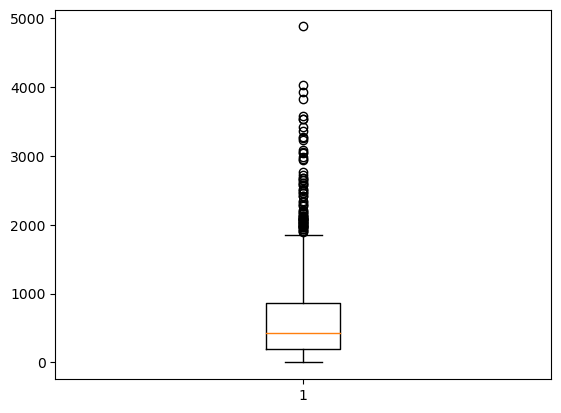

In [26]:
plt.boxplot(final_data['ViolentCrimesPerPop'])

(array([775., 344., 153.,  71.,  38.,  15.,  10.,   5.,   2.,   1.]),
 array([   0.   ,  487.706,  975.412, 1463.118, 1950.824, 2438.53 ,
        2926.236, 3413.942, 3901.648, 4389.354, 4877.06 ]),
 <BarContainer object of 10 artists>)

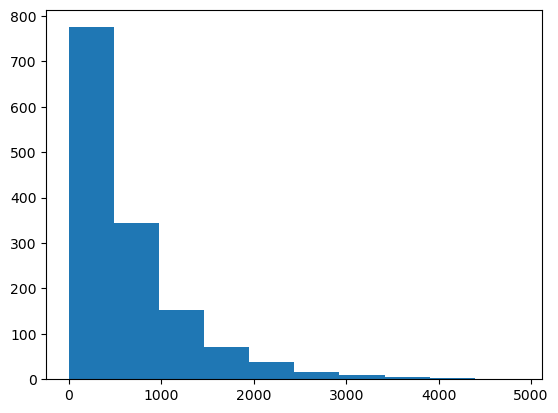

In [27]:
plt.hist(final_data['ViolentCrimesPerPop'])

From the above, can see that the distribution of violent crimes across communities is severely right-skewed, implying that a few communities have severe crime issues 

### Key Explanatory Variables


In [28]:
# look at the few explantory variables we think will correlate most with violate crime

In [29]:
# 1. PctLess9thGrade: % of population with less than a 9th grade education

(array([377., 483., 317., 128.,  52.,  19.,  20.,   7.,   7.,   4.]),
 array([ 0.2  ,  5.169, 10.138, 15.107, 20.076, 25.045, 30.014, 34.983,
        39.952, 44.921, 49.89 ]),
 <BarContainer object of 10 artists>)

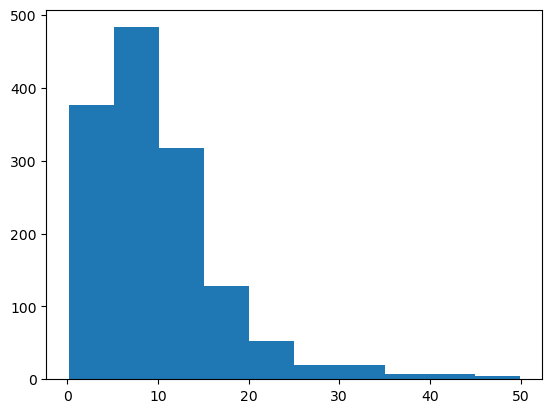

In [30]:
plt.hist(final_data['PctLess9thGrade'])

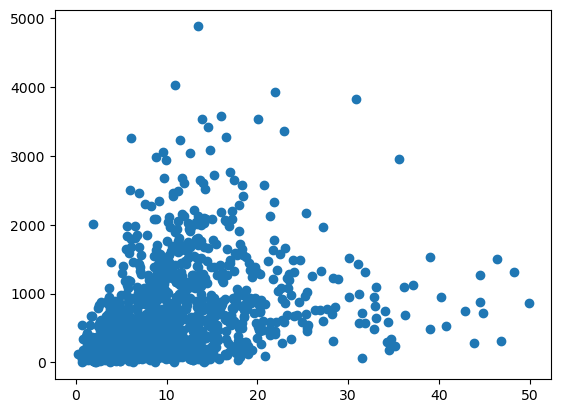

In [31]:
plt.scatter(final_data['PctLess9thGrade'], final_data['ViolentCrimesPerPop'])

In [32]:
# 2. has_pp_access: boolean, whether there is a Planned Parenthood in the community 

(array([1130.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         284.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

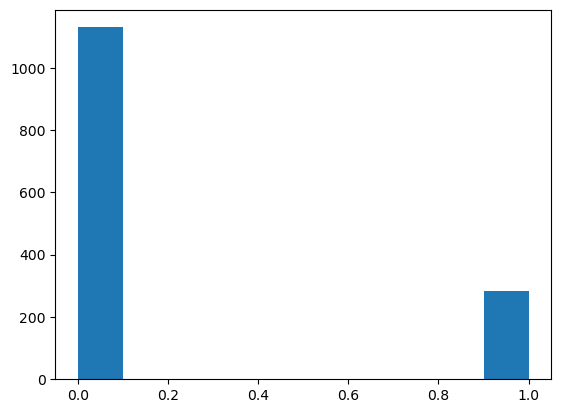

In [33]:
plt.hist(final_data['has_pp_access'])

In [34]:
# 3. pctWPubAsst: % of population using public assistance 

(array([260., 391., 303., 194., 128.,  61.,  39.,  23.,  12.,   3.]),
 array([ 0.64 ,  3.268,  5.896,  8.524, 11.152, 13.78 , 16.408, 19.036,
        21.664, 24.292, 26.92 ]),
 <BarContainer object of 10 artists>)

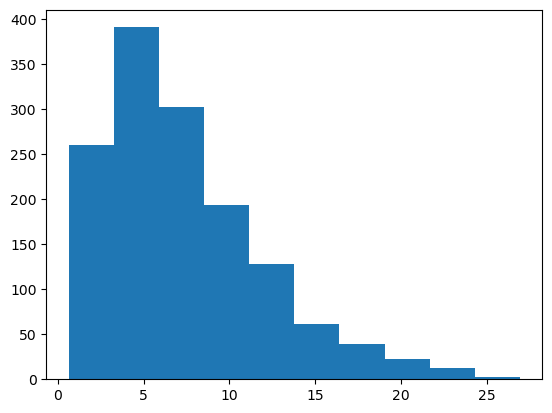

In [35]:
plt.hist(final_data['pctWPubAsst'])

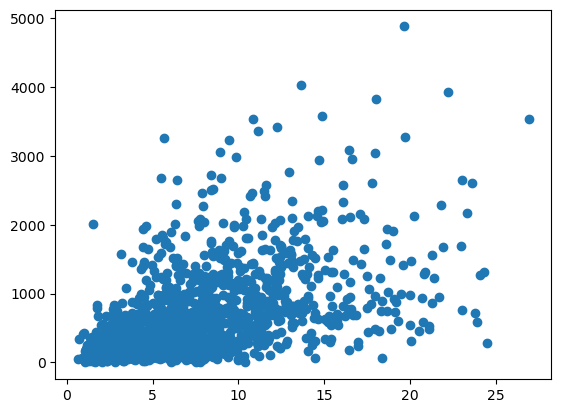

In [36]:
plt.scatter(final_data['pctWPubAsst'], final_data['ViolentCrimesPerPop'])

In [37]:
# 3. PctHousOccup: % of homes that are nonvacant 

(array([  1.,   0.,   2.,   4.,   2.,  11.,  18.,  68., 437., 871.]),
 array([37.47 , 43.587, 49.704, 55.821, 61.938, 68.055, 74.172, 80.289,
        86.406, 92.523, 98.64 ]),
 <BarContainer object of 10 artists>)

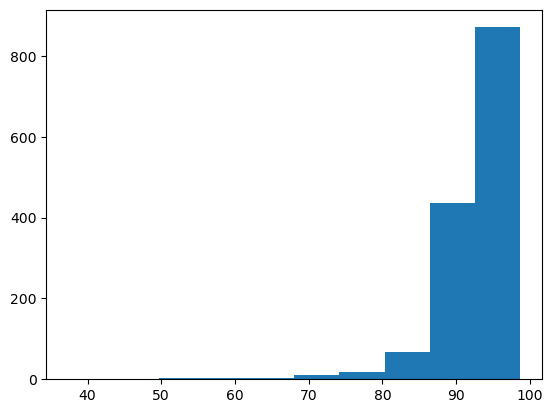

In [38]:
plt.hist(final_data['PctHousOccup'])

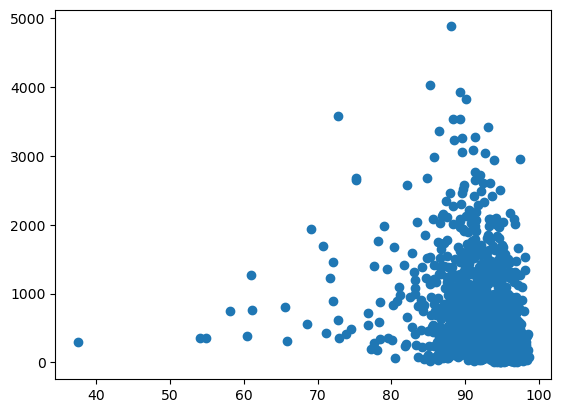

In [39]:
plt.scatter(final_data['PctHousOccup'], final_data['ViolentCrimesPerPop'])

In [40]:
# 4. PctUnemployed: % of population that is unemployed

(array([258., 513., 359., 172.,  66.,  29.,  11.,   5.,   0.,   1.]),
 array([ 1.66 ,  3.877,  6.094,  8.311, 10.528, 12.745, 14.962, 17.179,
        19.396, 21.613, 23.83 ]),
 <BarContainer object of 10 artists>)

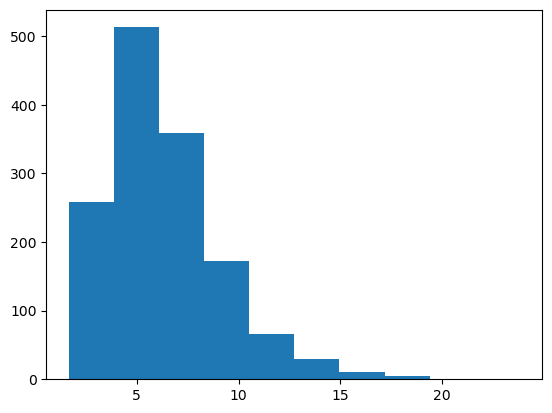

In [41]:
plt.hist(final_data['PctUnemployed'])

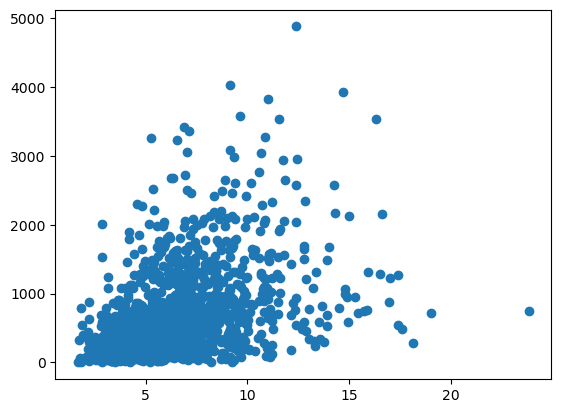

In [42]:
plt.scatter(final_data['PctUnemployed'], final_data['ViolentCrimesPerPop'])

In [43]:
# 5. PctLocalEduFunding: % of education funding by local govt (as opposed to federal or state)

(array([  9.,  67., 199., 269., 288., 206., 139., 109.,  88.,  40.]),
 array([ 2.44 , 11.774, 21.108, 30.442, 39.776, 49.11 , 58.444, 67.778,
        77.112, 86.446, 95.78 ]),
 <BarContainer object of 10 artists>)

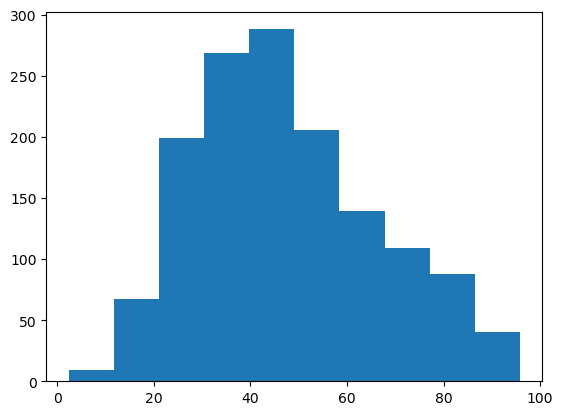

In [44]:
plt.hist(final_data['PctLocalEduFunding'])

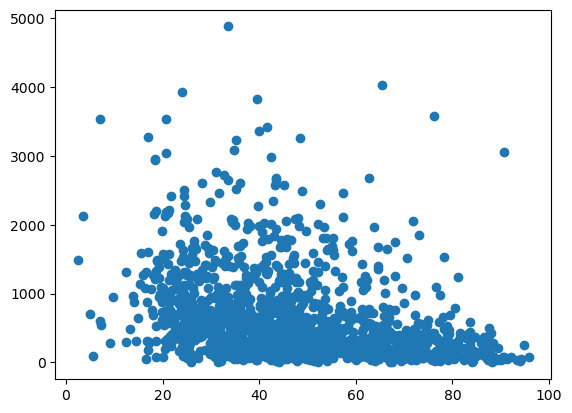

In [45]:
plt.scatter(final_data['PctLocalEduFunding'], final_data['ViolentCrimesPerPop'])

In [46]:
# some of these explanatory variables may be correlated amongst themselves
hypothesized_important_features = final_data[['PctLess9thGrade', 'has_pp_access', 'pctWPubAsst', 'PctUnemployed', 'PctLocalEduFunding']]

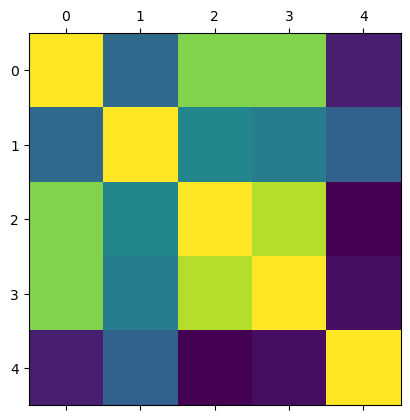

In [47]:
plt.matshow(hypothesized_important_features.corr())

In [48]:
# if performing linear regression, need to figure out how to deal with correlated variables (PCA or removal) 